# Создание датасета дорожных знаков из реальных данных

Dataset http://www.cvl.isy.liu.se/en/research/datasets/traffic-signs-dataset/download/

##### Сырой датасет в приложении укорочен, т.к. полный весит 1.5Гб


In [51]:
import os
data_path = 'data//data_raw//'
save_path = 'data//preprocessed//'
annotation_path = 'data//data_raw//annotations.txt'

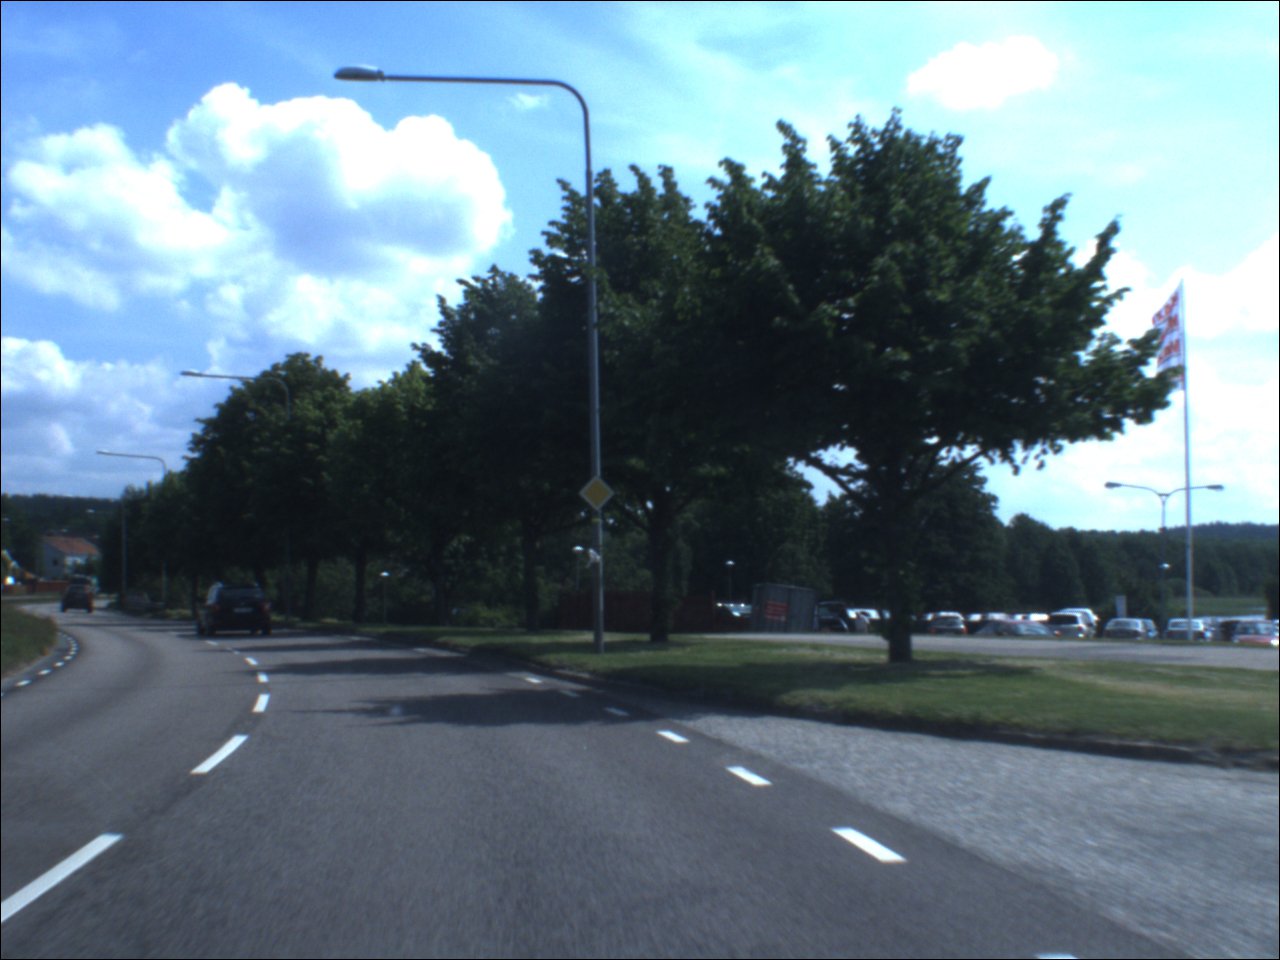

In [52]:
files = os.listdir(data_path)

from PIL import Image
pic = Image.open(data_path + files[10])

pic

### Структура датасета:  filename, [MISC], visibility, x1, y1,x2, y2, sign_type, name;visibility, x1, y1,x2, y2,...

In [53]:
labels = []
# Считаем данные в массив(строки)
with open(annotation_path) as file:
    for st in file:
        labels.append(st)      

Пример поля

In [54]:
labels[200]

'1277383042Image000001.jpg:MISC_SIGNS;VISIBLE, 576.943142, 728.311254, 544.943142, 699.311254, OTHER, OTHER;\n'

Пример поля с несколькими знаками

In [55]:
labels[19]

'1277381674Image000016.jpg:VISIBLE, 148.270809, 524.550801, 62.937476, 440.217468, MANDATORY, PASS_EITHER_SIDE;VISIBLE, 286.979195, 579.380842, 255.381653, 544.388522, MANDATORY, PASS_RIGHT_SIDE;SIDE_ROAD, 968.012675, 545.219812, 949.305220, 507.008842, WARNING, GIVE_WAY;SIDE_ROAD, 984.414562, 572.633670, 966.441589, 525.647183, MANDATORY, PASS_RIGHT_SIDE;\n'

### Приведём данные к удобному виду
Один знак - один элемент массива

In [57]:
signes = []
for i in range(len(labels)):
    label = labels[i]
    pic_name, label = label.split(':')
    label = label.replace('MISC_SIGNS;', '')
    label = label.replace(';\n', '')
    label = label.replace('\n', '')
    label = label.split(';')
        
    if len(label) == 1:
        continue
    
    for sign in label:
        sign = sign.replace(', ', ' ')
        sign = sign.replace(',', ' ')
        sign_info = sign.split(' ')
        for j in range(len(sign_info)):
            try:
                sign_info[j] = float(sign_info[j])
            except:
                pass
        signes.append([pic_name, sign_info])

### Теперь данные выглядят так

In [59]:
for i in range(10):
    print(signes[i])

['1277381674Image000001.jpg', ['VISIBLE', 432.168746, 573.90572, 393.149818, 533.12654, 'MANDATORY', 'PASS_EITHER_SIDE']]
['1277381674Image000001.jpg', ['OCCLUDED', 436.049047, 589.307319, 414.01581, 566.716278, 'MANDATORY', 'PASS_RIGHT_SIDE']]
['1277381674Image000001.jpg', ['SIDE_ROAD', 902.124657, 560.841548, 886.173785, 533.580059, 'WARNING', 'GIVE_WAY']]
['1277381674Image000006.jpg', ['VISIBLE', 377.317885, 571.287927, 331.078253, 521.460738, 'MANDATORY', 'PASS_EITHER_SIDE']]
['1277381674Image000006.jpg', ['BLURRED', 397.309971, 591.901314, 371.812402, 564.463713, 'MANDATORY', 'PASS_RIGHT_SIDE']]
['1277381674Image000006.jpg', ['SIDE_ROAD', 914.953331, 559.566316, 895.052096, 530.862613, 'WARNING', 'GIVE_WAY']]
['1277381674Image000011.jpg', ['VISIBLE', 282.379131, 550.546745, 220.695232, 486.806716, 'MANDATORY', 'PASS_EITHER_SIDE']]
['1277381674Image000011.jpg', ['BLURRED', 342.235575, 584.020463, 314.081149, 554.133457, 'MANDATORY', 'PASS_RIGHT_SIDE']]
['1277381674Image000011.jpg',

Посмотрим на поле датасета

(6.750879, 587.286635, 60.750879, 639.286635)


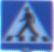

In [60]:
n = 70
a = signes[n][1]
b = (a[3], a[4], a[1], a[2])
print(b)

pic = Image.open(data_path + signes[n][0])
pic.crop(b)

In [61]:
import matplotlib.pyplot as plt

### Выведем больше элементов, чтобы убедиться, что с датасетом всё хорошо

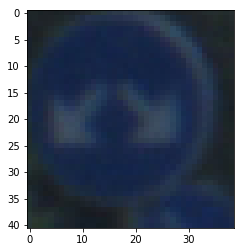

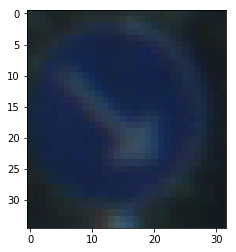

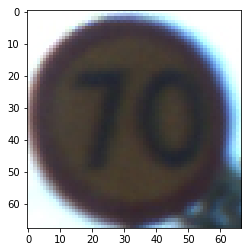

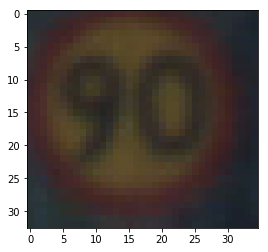

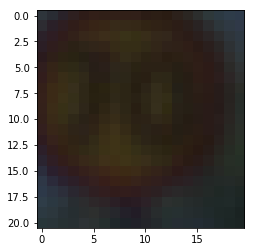

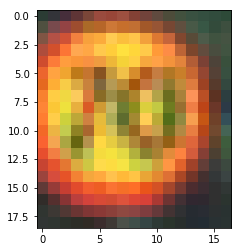

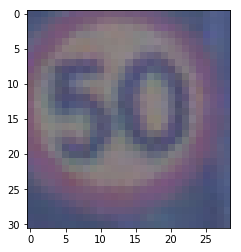

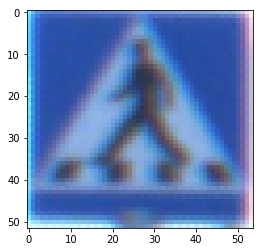

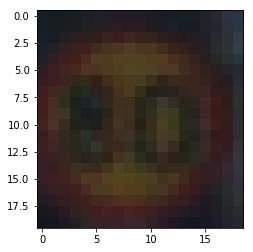

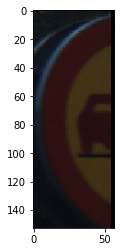

In [62]:
for i in range(0, 100, 10):
    pic = Image.open(data_path + signes[i][0])
    sign_info = signes[i][1]
    box = (sign_info[3], sign_info[4], sign_info[1], sign_info[2])
    
    pic = pic.crop(box)
    plt.figure()
    plt.imshow(pic)

# Запуск препроцессинга

Каждый знак сохраним как отдельную картинку и создадим файл с данными о том, что на картинках

In [47]:
# Эту строку после сохраним в csv
labels = 'file_name,label\n'
for i in range(len(signes)):
    pic = Image.open(data_path + signes[i][0])
    sign_info = signes[i][1]
    #print(sign_info)
    box = (sign_info[3], sign_info[4], sign_info[1], sign_info[2])
    
    # Уберём слишком маленькие картинки
    #print(box[2], box[0])
    if box[2] - box[0] < 20:
        continue
    
    pic = pic.crop(box)
    # Сохраняем картинку со знаком в конечную папку
    file_name = 'picture-{:05d}'.format(i) + '.jpg'
    pic.save(save_path + 'picture-{:05d}'.format(i) + '.jpg')
    
    labels += file_name + ',' + sign_info[6] + '\n'

In [48]:
with open(save_path + 'labels__.csv', 'w') as file:
    file.write(labels)

# Данные готовы!